In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
import keras

In [5]:
train_data=ImageDataGenerator(rescale=1./255)
Val_data=ImageDataGenerator(rescale=1./255)
Test_data=ImageDataGenerator(rescale=1/255)
train_generator=train_data.flow_from_directory("/content/gdrive/MyDrive/Original Dataset/Train",target_size=(224,224),batch_size=20,class_mode='categorical')
Val_generator=Test_data.flow_from_directory("/content/gdrive/MyDrive/Original Dataset/Test",target_size=(224,224),batch_size=20,class_mode='categorical')
test_generation=Test_data.flow_from_directory("/content/gdrive/MyDrive/Original Dataset/Val",target_size=(224,224),batch_size=20,class_mode='categorical')

Found 2123 images belonging to 3 classes.
Found 700 images belonging to 3 classes.
Found 705 images belonging to 3 classes.


In [6]:
base_model=DenseNet121(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling='Average',

    
    )

29089792/29084464 [==============================] - 0s 0us/step


In [8]:
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [9]:
base_model.trainable=False

In [10]:
model=models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(1024,activation='relu',kernel_regularizer=keras.regularizers.l2(.8)))
model.add(layers.Dense(3,activation="sigmoid"))

In [13]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=1e-3),metrics='acc')

In [14]:
class_weight={0:4,1:1,2:1}

In [15]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=20,validation_data=Val_generator,validation_steps=35,class_weight=class_weight)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/20
100/100 [==============================] - 946s 9s/step - loss: 330.4389 - acc: 0.7108 - val_loss: 11.3341 - val_acc: 0.7743
Epoch 2/20
100/100 [==============================] - 34s 343ms/step - loss: 11.6159 - acc: 0.8672 - val_loss: 5.1531 - val_acc: 0.8700
Epoch 3/20
100/100 [==============================] - 13s 134ms/step - loss: 5.5157 - acc: 0.8734 - val_loss: 7.3277 - val_acc: 0.6486
Epoch 4/20
100/100 [==============================] - 13s 127ms/step - loss: 5.7665 - acc: 0.8404 - val_loss: 4.5831 - val_acc: 0.7343
Epoch 5/20
100/100 [==============================] - 13s 127ms/step - loss: 3.4676 - acc: 0.8721 - val_loss: 0.9181 - val_acc: 0.8714
Epoch 6/20
100/100 [==============================] - 13s 128ms/step - loss: 1.8808 - acc: 0.8850 - val_loss: 2.3514 - val_acc: 0.8971
Epoch 7/20
100/100 [==============================

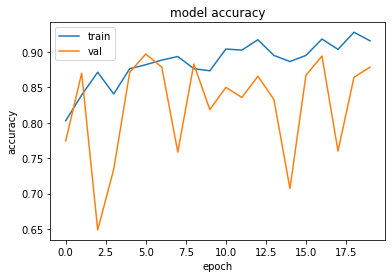

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

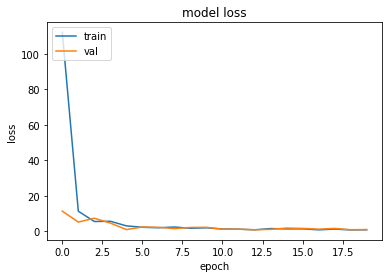

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
test_loss,test_acc=model.evaluate_generator(test_generation,35)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [19]:
print('test_acc',test_acc)

test_acc 0.9128571152687073


In [20]:
print("test_loss",test_loss)

test_loss 0.8730951547622681
